### Generate Linear Data With Some Randomness

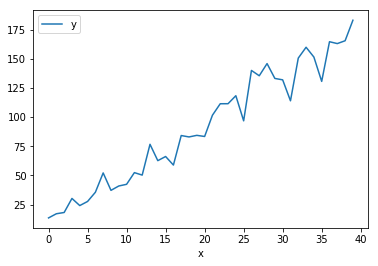

In [26]:
import numpy as np
import pandas as pd

N=40
x_values = np.arange(N)
y_values = (4 * x_values + 12) * (1 + 0.1 * np.random.randn(N))

data = {
    "x": x_values,
    "y": y_values
}

df = pd.DataFrame(data)
df.plot (x="x", y="y")

### Patsy Formula

In [27]:
import patsy
y, X = patsy.dmatrices("y ~ x", df) # with one independent variable
y[-5:]

array([[130.64008494],
       [164.63870648],
       [163.0482021 ],
       [165.46592361],
       [183.04614365]])

In [29]:
X[-5:]

array([[ 1., 35.],
       [ 1., 36.],
       [ 1., 37.],
       [ 1., 38.],
       [ 1., 39.]])

In [30]:
coef, resid,_,_ = np.linalg.lstsq(X,y, rcond=None)
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)
coef

Intercept    9.356702
x            4.201604
dtype: float64

### Data Transfromation in Patsy Formula
- python codes can be mixed in patsy formula

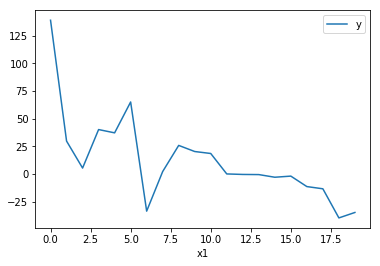

In [5]:
var_x0 = np.arange(20)
var_x1 = np.arange(19, -1, -1)
var_y = (var_x0 - 3 * var_x1 + 30) * (1- np.random.randn(20))

raw_data = {
    "x0": var_x0,
    "x1": var_x1,
    "y": var_y
}

df = pd.DataFrame(raw_data)
df.plot(x="x1", y="y")


In [6]:
y, X = patsy.dmatrices("y ~ x0 + np.sqrt(x1)", df)
X

DesignMatrix with shape (20, 3)
  Intercept  x0  np.sqrt(x1)
          1   0      4.35890
          1   1      4.24264
          1   2      4.12311
          1   3      4.00000
          1   4      3.87298
          1   5      3.74166
          1   6      3.60555
          1   7      3.46410
          1   8      3.31662
          1   9      3.16228
          1  10      3.00000
          1  11      2.82843
          1  12      2.64575
          1  13      2.44949
          1  14      2.23607
          1  15      2.00000
          1  16      1.73205
          1  17      1.41421
          1  18      1.00000
          1  19      0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.sqrt(x1)' (column 2)

In [7]:
y, X = patsy.dmatrices("center(y) ~ center(x0) + standardize(x1)", df)
X

DesignMatrix with shape (20, 3)
  Intercept  center(x0)  standardize(x1)
          1        -9.5          1.64751
          1        -8.5          1.47409
          1        -7.5          1.30066
          1        -6.5          1.12724
          1        -5.5          0.95382
          1        -4.5          0.78040
          1        -3.5          0.60698
          1        -2.5          0.43355
          1        -1.5          0.26013
          1        -0.5          0.08671
          1         0.5         -0.08671
          1         1.5         -0.26013
          1         2.5         -0.43355
          1         3.5         -0.60698
          1         4.5         -0.78040
          1         5.5         -0.95382
          1         6.5         -1.12724
          1         7.5         -1.30066
          1         8.5         -1.47409
          1         9.5         -1.64751
  Terms:
    'Intercept' (column 0)
    'center(x0)' (column 1)
    'standardize(x1)' (column 2)

In [8]:
## + in patsy formula is not add, func I is used for addition
x, Y = patsy.dmatrices("y ~ I(x0-2*x1) + x1", df)
Y

DesignMatrix with shape (20, 3)
  Intercept  I(x0 - 2 * x1)  x1
          1             -38  19
          1             -35  18
          1             -32  17
          1             -29  16
          1             -26  15
          1             -23  14
          1             -20  13
          1             -17  12
          1             -14  11
          1             -11  10
          1              -8   9
          1              -5   8
          1              -2   7
          1               1   6
          1               4   5
          1               7   4
          1              10   3
          1              13   2
          1              16   1
          1              19   0
  Terms:
    'Intercept' (column 0)
    'I(x0 - 2 * x1)' (column 1)
    'x1' (column 2)

### Categorical data

In [9]:
df_cat = df.copy()
df_cat["cat"] = np.random.choice(list("abcd"), 20)

In [10]:
y, X = patsy.dmatrices("y~cat+0", df_cat) ## "+0" omit intercept
X

DesignMatrix with shape (20, 4)
  cat[a]  cat[b]  cat[c]  cat[d]
       0       1       0       0
       0       1       0       0
       0       0       1       0
       1       0       0       0
       0       1       0       0
       0       1       0       0
       1       0       0       0
       0       0       0       1
       0       0       0       1
       0       0       1       0
       0       1       0       0
       1       0       0       0
       0       0       1       0
       0       0       0       1
       1       0       0       0
       1       0       0       0
       0       1       0       0
       0       1       0       0
       1       0       0       0
       0       0       0       1
  Terms:
    'cat' (columns 0:4)

### Multiple Category columns

In [11]:
df_cat["cat2"] = np.random.choice(["zero", "one"], 20)

In [15]:
y,X = patsy.dmatrices("y~x0+cat+cat2+0", df_cat)
X

DesignMatrix with shape (20, 6)
  cat[a]  cat[b]  cat[c]  cat[d]  cat2[T.zero]  x0
       0       1       0       0             0   0
       0       1       0       0             0   1
       0       0       1       0             0   2
       1       0       0       0             1   3
       0       1       0       0             1   4
       0       1       0       0             0   5
       1       0       0       0             1   6
       0       0       0       1             1   7
       0       0       0       1             0   8
       0       0       1       0             1   9
       0       1       0       0             1  10
       1       0       0       0             1  11
       0       0       1       0             0  12
       0       0       0       1             0  13
       1       0       0       0             0  14
       1       0       0       0             1  15
       0       1       0       0             0  16
       0       1       0       0             0  17

In [22]:
y,X = patsy.dmatrices("y~x0+cat:cat2+0", df_cat)
X

DesignMatrix with shape (20, 9)
  Columns:
    ['cat[a]:cat2[one]',
     'cat[b]:cat2[one]',
     'cat[c]:cat2[one]',
     'cat[d]:cat2[one]',
     'cat[a]:cat2[zero]',
     'cat[b]:cat2[zero]',
     'cat[c]:cat2[zero]',
     'cat[d]:cat2[zero]',
     'x0']
  Terms:
    'cat:cat2' (columns 0:8), 'x0' (column 8)
  (to view full data, use np.asarray(this_obj))